In [ ]:
#____________________________크롤링______________________________________

In [ ]:
#유튜브 크롤링
#유튜브는 페이지가 없고, 화면 끝까지 스크롤 후 페이지의 내용을 크롤링해야 함

#body.send_key(Keys.END): 화면에 END 키를 입력(화면 스크롤)
#driver.execute_script("return document.documentElement.scrollHeight"): 현재 화면의 크기
#스크롤 키를 눌렀을 때의 화면 크기와 비교해서 화면 크기의 변화가 없으면 스크롤을 종료

In [1]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from bs4 import BeautifulSoup

In [2]:
import requests, time, re

In [3]:
driver = webdriver.Chrome("chromedriver.exe") 

#암시적 대기: 시간을 정해놓고 대기, 시간이 다 지나기 전에 로드 완료 시 생략
driver.implicitly_wait(10) #페이지 로드 대기시간 10초, 10초 이전에 로드 완료시 무시

driver.get("https://www.youtube.com/channel/UC-Bsa2ivAGWq7bsSPrPGFVA") #웹사이트로 이동

In [4]:
body = driver.find_element_by_tag_name("body") #body 태그 선택
body.get_attribute("outerHTML") #body 태그 확인

'<body dir="ltr"><iframe src="https://accounts.google.com/ServiceLogin?service=youtube&amp;hl=ko&amp;continue=https%3A%2F%2Fwww.youtube.com%2Fsignin%3Fapp%3Ddesktop%26hl%3Dko%26feature%3Dpassive%26action_handle_signin%3Dtrue%26next%3D%252Fsignin_passive&amp;uilel=3&amp;passive=true" style="display: none"></iframe><!-- end of chunk -->    <script>if (window.ytcsi) {window.ytcsi.tick("ai", null, \'\');}</script>\n  <ytd-app mini-guide-visible_=""><!--css-build:shady-->\n    \n    <yt-activity-manager class="style-scope ytd-app"></yt-activity-manager>\n    <yt-guide-manager id="guide-service" class="style-scope ytd-app">\n    </yt-guide-manager>\n    <yt-gfeedback-manager class="style-scope ytd-app"></yt-gfeedback-manager>\n    <yt-mdx-manager class="style-scope ytd-app"></yt-mdx-manager>\n    <yt-navigation-manager id="nav" class="style-scope ytd-app"></yt-navigation-manager>\n    <yt-network-manager id="net" class="style-scope ytd-app"></yt-network-manager>\n    <yt-playlist-manager cla

In [5]:
#채널 기본 화면에서 '동영상' 탭 클릭하기 
contents_bar = body.find_elements_by_tag_name("paper-tab")
video_tab = None

for content in contents_bar:
    if content.text == "동영상":
        video_tab = content

video_tab.click()

In [6]:
SCROLL_PAUSE_TIME = 0.5 #한 번 스크롤 후 멈출 시간 설정

#break가 실행될 때(스크롤 전후의 화면 크기가 같음)까지 반복
while True:
    last_height = driver.execute_script("return document.documentElement.scrollHeight") #현재 화면의 길이 - 자바스크립트 활용
    print("last_height: ", last_height)

    for i in range(10):
        body.send_keys(Keys.END) #화면 끝가지 스크롤, 화면이 길어짐
        time.sleep(SCROLL_PAUSE_TIME) #0.5초 멈춤
        
    new_height = driver.execute_script("return document.documentElement.scrollHeight") #스크롤 후 화면 길이
    print("new_height: ", new_height)
    print()
    
    if new_height == last_height: #스크롤 전후 화면 길이가 같다면
        break #반복 종료

last_height:  2278
new_height:  13758

last_height:  13758
new_height:  22048

last_height:  22048
new_height:  30048

last_height:  30048
new_height:  37818

last_height:  37818
new_height:  48948

last_height:  48948
new_height:  58398

last_height:  58398
new_height:  66168

last_height:  66168
new_height:  75618

last_height:  77298
new_height:  85068

last_height:  86732
new_height:  96182

last_height:  96182
new_height:  105168

last_height:  105168
new_height:  105168



In [7]:
page = driver.page_source #페이지 소스 대입

soup = BeautifulSoup(page, "lxml") #페이지에 저장된 태그를 정리해서 리턴
soup

In [8]:
all_videos = soup.find_all(id = "dismissable") #id 속성이 dismissable 인 객체 조회

In [9]:
title_list = []

for video in all_videos: #각 동영상 하나하나에 대해서
    title = video.find(id = "video-title") #video에서 id 속성이 video-title 속성을 갖는 객체 조회(제목)
    if len(title.text.strip()) > 0: #공백을 제거하고, 글자수가 0보다 크면
        title_list.append(title.text) #리스트에 추가 

print(len(title_list))
print(title_list)

150
['4년 만에 돌아온 햇님표 스크램블 에그 먹방~!! 20200702/Mukbang', '시원하게 육전냉면과 명태육전보쌈 모듬전 먹방~!! 20200702/Mukbang, eating show', '치과 다녀와서 오늘은 빵만 먹겠습니다  20200701/Mukbang', '결국 먹게되는 후식 서브웨이 샌드위치 75cm 먹방 20200630/Mukbang', '친구가 하나씩 끓여주는 라면 먹기 20200630/Mukbang', '짜장면 ,깐쇼새우, 마라탕, 버섯꿔바로우 등 중식 먹방~ 20200628/Mukbang, eating show', '[ENG/EDIT] 삼겹살 3키로와 진비빔면 3개 먹방편~! /20200625방송 편집버전', '[ENG/EDIT] 치킨 3마리와 (뿌링클, 페리카나, 자메이카) 치즈볼 먹방편~! /20200623방송 편집버전', '삼겹살 3키로와 진비빔면 먹방~!! 20200625/Mukbang', '파리바게트 리얼후레쉬베리케이크 후식 먹방~! 20200624/Mukbang, eating show', '호프집 국물떡볶이와 튀김 먹방~!! 20200624/Mukbang, eating show', '후식은 달달하게 메론 먹방! 20200623/Mukbang', '오늘은 치콜!! 페리카나, bhc 뿌링클, bbq 자메이카 치킨& 치즈볼 먹방!! 20200623/mukbang', '[ENG/EDIT]  진주회관 콩국수와 후식 빌리엔젤 케이크 먹방편~! /20200618방송 편집버전', '[ENG/EDIT] 간장게장 5마리와 후식  멘보샤 먹방편~! /20200615 방송 편집버전', '빌리엔젤 조각케이크로 후식 먹방~ 20200618', '여름엔 콩국수! 진주회관 콩국수와 김치전 골뱅이무침 먹방~! 20200618', '후식 진짜 안 먹으려고 했어요!! 했는데.... 20200617/Mukbang, eating show', '입맛 떨어지는 여름에는 제육쌈밥과 청국장 먹방!!  20200617/Mukbang, eating show', '햄

In [10]:
video_time_list = []

for video in all_videos:
    video_time = video.find("span", {"class" : "style -scope ytd-thumbnail-overlay-time-status-renderer"})
    video_time_list.append(video_time.text.strip()) #공백 제거 후 리스트에 추가
    
print(video_time_list)    

['1:19:33', '33:58', '1:38:33', '40:20', '47:23', '1:48:57', '14:51', '17:16', '1:36:25', '29:26', '55:30', '44:11', '1:05:13', '20:11', '20:16', '40:02', '50:43', '1:23:16', '50:04', '39:17', '44:48', '53:41', '53:42', '14:50', '19:08', '1:14:40', '36:32', '1:34:01', '45:13', '41:39', '39:43', '1:05:00', '14:59', '12:47', '15:08', '41:18', '39:52', '47:47', '41:29', '44:49', '54:35', '41:54', '19:44', '15:15', '46:19', '1:36:31', '44:51', '56:56', '47:25', '48:56', '42:00', '15:34', '11:27', '55:55', '35:12', '44:08', '34:42', '1:10:57', '50:19', '45:55', '25:37', '39:38', '12:41', '16:26', '12:18', '1:02:25', '57:15', '26:00', '1:03:08', '50:20', '1:11:13', '14:02', '8:36', '1:34:12', '1:28:12', '1:11:34', '48:58', '14:40', '11:39', '12:42', '33:10', '45:39', '1:47:13', '46:41', '50:34', '44:10', '1:09:28', '1:07:39', '17:02', '12:53', '1:21:45', '1:07:39', '1:11:55', '41:52', '1:13:39', '18:08', '13:15', '15:51', '2:01:30', '1:04:54', '51:29', '1:58:39', '1:45:19', '44:12', '55:07',

In [11]:
video_time_seperate_list = []

for time in video_time_list:
    time_list = time.split(":") #time을 :을 기준으로 분리, 리스트 형태로 저장됨
    if len(time_list) < 3:
        video_time_seperate_list.append(int(time_list[0]) * 60 + int(time_list[1])) #분/초
    else:
        video_time_seperate_list.append(int(time_list[0]) * 3600 + int(time_list[1]) * 60 + int(time_list[2])) #시/분/초
        
video_time_seperate_list

[4773,
 2038,
 5913,
 2420,
 2843,
 6537,
 891,
 1036,
 5785,
 1766,
 3330,
 2651,
 3913,
 1211,
 1216,
 2402,
 3043,
 4996,
 3004,
 2357,
 2688,
 3221,
 3222,
 890,
 1148,
 4480,
 2192,
 5641,
 2713,
 2499,
 2383,
 3900,
 899,
 767,
 908,
 2478,
 2392,
 2867,
 2489,
 2689,
 3275,
 2514,
 1184,
 915,
 2779,
 5791,
 2691,
 3416,
 2845,
 2936,
 2520,
 934,
 687,
 3355,
 2112,
 2648,
 2082,
 4257,
 3019,
 2755,
 1537,
 2378,
 761,
 986,
 738,
 3745,
 3435,
 1560,
 3788,
 3020,
 4273,
 842,
 516,
 5652,
 5292,
 4294,
 2938,
 880,
 699,
 762,
 1990,
 2739,
 6433,
 2801,
 3034,
 2650,
 4168,
 4059,
 1022,
 773,
 4905,
 4059,
 4315,
 2512,
 4419,
 1088,
 795,
 951,
 7290,
 3894,
 3089,
 7119,
 6319,
 2652,
 3307,
 935,
 970,
 1860,
 4122,
 2463,
 2138,
 3592,
 2556,
 2782,
 902,
 973,
 560,
 6842,
 3749,
 3915,
 2839,
 2967,
 2538,
 961,
 1109,
 1961,
 3782,
 2155,
 4839,
 1867,
 4090,
 4050,
 1209,
 1007,
 2193,
 205,
 5731,
 3464,
 4965,
 3054,
 4537,
 973,
 1010,
 485,
 4116,
 5053,
 2221,

In [13]:
view_num_list = []
view_num_regexp = re.compile(r"조회수") #조회수를 포함하는 문자열 검색

for video in all_videos:
    view_num = video.find("span", {"class" : "style-scope ytd-grid-video-renderer"})
    
    if view_num_regexp.search(view_num.text): #조회수 문자열이 포함되어 있으면
        view_num_list.append(view_num.text) #리스트에 추가

view_num_list

['조회수 9.1만회',
 '조회수 5.1만회',
 '조회수 11만회',
 '조회수 13만회',
 '조회수 21만회',
 '조회수 19만회',
 '조회수 11만회',
 '조회수 9.8만회',
 '조회수 27만회',
 '조회수 9.4만회',
 '조회수 15만회',
 '조회수 6.5만회',
 '조회수 15만회',
 '조회수 10만회',
 '조회수 11만회',
 '조회수 13만회',
 '조회수 18만회',
 '조회수 15만회',
 '조회수 12만회',
 '조회수 23만회',
 '조회수 13만회',
 '조회수 23만회',
 '조회수 20만회',
 '조회수 10만회',
 '조회수 19만회',
 '조회수 20만회',
 '조회수 14만회',
 '조회수 17만회',
 '조회수 18만회',
 '조회수 22만회',
 '조회수 9.1만회',
 '조회수 26만회',
 '조회수 11만회',
 '조회수 13만회',
 '조회수 18만회',
 '조회수 13만회',
 '조회수 19만회',
 '조회수 11만회',
 '조회수 13만회',
 '조회수 28만회',
 '조회수 16만회',
 '조회수 15만회',
 '조회수 30만회',
 '조회수 9.5만회',
 '조회수 34만회',
 '조회수 22만회',
 '조회수 11만회',
 '조회수 25만회',
 '조회수 33만회',
 '조회수 11만회',
 '조회수 23만회',
 '조회수 13만회',
 '조회수 12만회',
 '조회수 41만회',
 '조회수 14만회',
 '조회수 26만회',
 '조회수 14만회',
 '조회수 19만회',
 '조회수 11만회',
 '조회수 19만회',
 '조회수 17만회',
 '조회수 31만회',
 '조회수 9.7만회',
 '조회수 13만회',
 '조회수 66만회',
 '조회수 16만회',
 '조회수 15만회',
 '조회수 19만회',
 '조회수 20만회',
 '조회수 19만회',
 '조회수 26만회',
 '조회수 22만회',
 '조회수 70만회',
 '조회수 40만회',
 '조회수 107만회',
 '조회수 27만회',
 '조

In [14]:
view_number_type_list = [] #조회수를 숫자로 변환해서 저장

for view in view_num_list:
    view = view.replace("조회수", "") #조회수 문자열 삭제
    num = float(view[:-2]) #view의 마지막 두번째 문자열까지가 숫자 - 실수로 변환
    danwee = view[-2:] #단위 대입 ex.만회, 천회
    
    if danwee == "만회":
        view_number_type_list.append(int(num * 10000))
    else:
        view_number_type_list.append(int(num * 1000))

view_number_type_list

[91000,
 51000,
 110000,
 130000,
 210000,
 190000,
 110000,
 98000,
 270000,
 94000,
 150000,
 65000,
 150000,
 100000,
 110000,
 130000,
 180000,
 150000,
 120000,
 230000,
 130000,
 230000,
 200000,
 100000,
 190000,
 200000,
 140000,
 170000,
 180000,
 220000,
 91000,
 260000,
 110000,
 130000,
 180000,
 130000,
 190000,
 110000,
 130000,
 280000,
 160000,
 150000,
 300000,
 95000,
 340000,
 220000,
 110000,
 250000,
 330000,
 110000,
 230000,
 130000,
 120000,
 410000,
 140000,
 260000,
 140000,
 190000,
 110000,
 190000,
 170000,
 310000,
 97000,
 130000,
 660000,
 160000,
 150000,
 190000,
 200000,
 190000,
 260000,
 220000,
 700000,
 400000,
 1070000,
 270000,
 430000,
 160000,
 220000,
 340000,
 200000,
 220000,
 610000,
 420000,
 230000,
 120000,
 290000,
 320000,
 240000,
 180000,
 550000,
 310000,
 560000,
 220000,
 280000,
 450000,
 310000,
 160000,
 820000,
 230000,
 390000,
 420000,
 410000,
 140000,
 540000,
 170000,
 280000,
 210000,
 290000,
 180000,
 190000,
 190000,

In [15]:
#제목, 재생시간, 조회수 딕셔너리화
dict_youtube = { 
    "title" : title_list,
    "video_time" : video_time_seperate_list,
    "view_num" : view_number_type_list
}

In [16]:
import pandas as pd

In [17]:
youtube = pd.DataFrame(dict_youtube) #딕셔너리를 데이터 프레임으로 변환
youtube

,title,video_time,view_num
0,4년 만에 돌아온 햇님표 스크램블 에그 먹방~!! 20200702/Mukbang,4773,91000
1,"시원하게 육전냉면과 명태육전보쌈 모듬전 먹방~!! 20200702/Mukbang, ...",2038,51000
2,치과 다녀와서 오늘은 빵만 먹겠습니다 20200701/Mukbang,5913,110000
3,결국 먹게되는 후식 서브웨이 샌드위치 75cm 먹방 20200630/Mukbang,2420,130000
4,친구가 하나씩 끓여주는 라면 먹기 20200630/Mukbang,2843,210000
...,...,...,...
145,"간만에 먹는 마라탕과 꿔바로우 먹방!! 20200312/ Mukbang, eatin...",5053,270000
146,게임 무경험자 햇님의 배틀 그라운드 입성기!! 20200311,2221,33000
147,"간만에 먹는 다쿠아즈로 후식 먹방~! 20200311/Mukbang, eating ...",2044,100000
148,"드디어 먹는 불닭치킨 그리고피자 먹방!! 20200311Mukbang, eating...",4322,170000


In [18]:
driver.quit()

In [ ]:
#____________________________텍스트 분석______________________________________

In [19]:
from konlpy.tag import Twitter

In [53]:
twitter = Twitter() #문장을 단어 단위로 나누고, 단어/품사를 리턴

C:\ai\python\anaconda3\lib\site-packages\konlpy\tag\_okt.py:16: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


In [21]:
tagged = twitter.pos(youtube["title"][0]) #.pos(): 텍스트에 품사 정보를 부착해 반환
tagged

[('4년', 'Number'),
 ('만에', 'Josa'),
 ('돌아온', 'Verb'),
 ('햇님', 'Noun'),
 ('표', 'Noun'),
 ('스크램블', 'Noun'),
 ('에그', 'Exclamation'),
 ('먹방', 'Noun'),
 ('~!!', 'Punctuation'),
 ('20200702', 'Number'),
 ('/', 'Punctuation'),
 ('Mukbang', 'Alpha')]

In [22]:
tagged = twitter.pos(youtube["title"][0], stem = True) #stem = True 단어의 원형을 찾아줌
tagged

[('4년', 'Number'),
 ('만에', 'Josa'),
 ('돌아오다', 'Verb'),
 ('햇님', 'Noun'),
 ('표', 'Noun'),
 ('스크램블', 'Noun'),
 ('에그', 'Exclamation'),
 ('먹방', 'Noun'),
 ('~!!', 'Punctuation'),
 ('20200702', 'Number'),
 ('/', 'Punctuation'),
 ('Mukbang', 'Alpha')]

In [23]:
for i in range(0, len(tagged)):
    if (tagged[i][1] == "Noun"): #품사가 명사인 것만 출력
        print(tagged[i])

('햇님', 'Noun')
('표', 'Noun')
('스크램블', 'Noun')
('먹방', 'Noun')


In [24]:
for i in range(0, len(tagged)):
    if (tagged[i][1] == "Noun"): #품사가 명사인 것 중 단어만 출력(품사 태그 제거)
        print(tagged[i][0])

햇님
표
스크램블
먹방


In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
from matplotlib import font_manager, rc

font_name = font_manager.FontProperties(fname = "C:/Windows/Fonts/malgun.ttf").get_name()
rc("font", family = font_name) #폰트

C:\ai\python\anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\ai\python\anaconda3\lib\site-packages\seaborn\categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


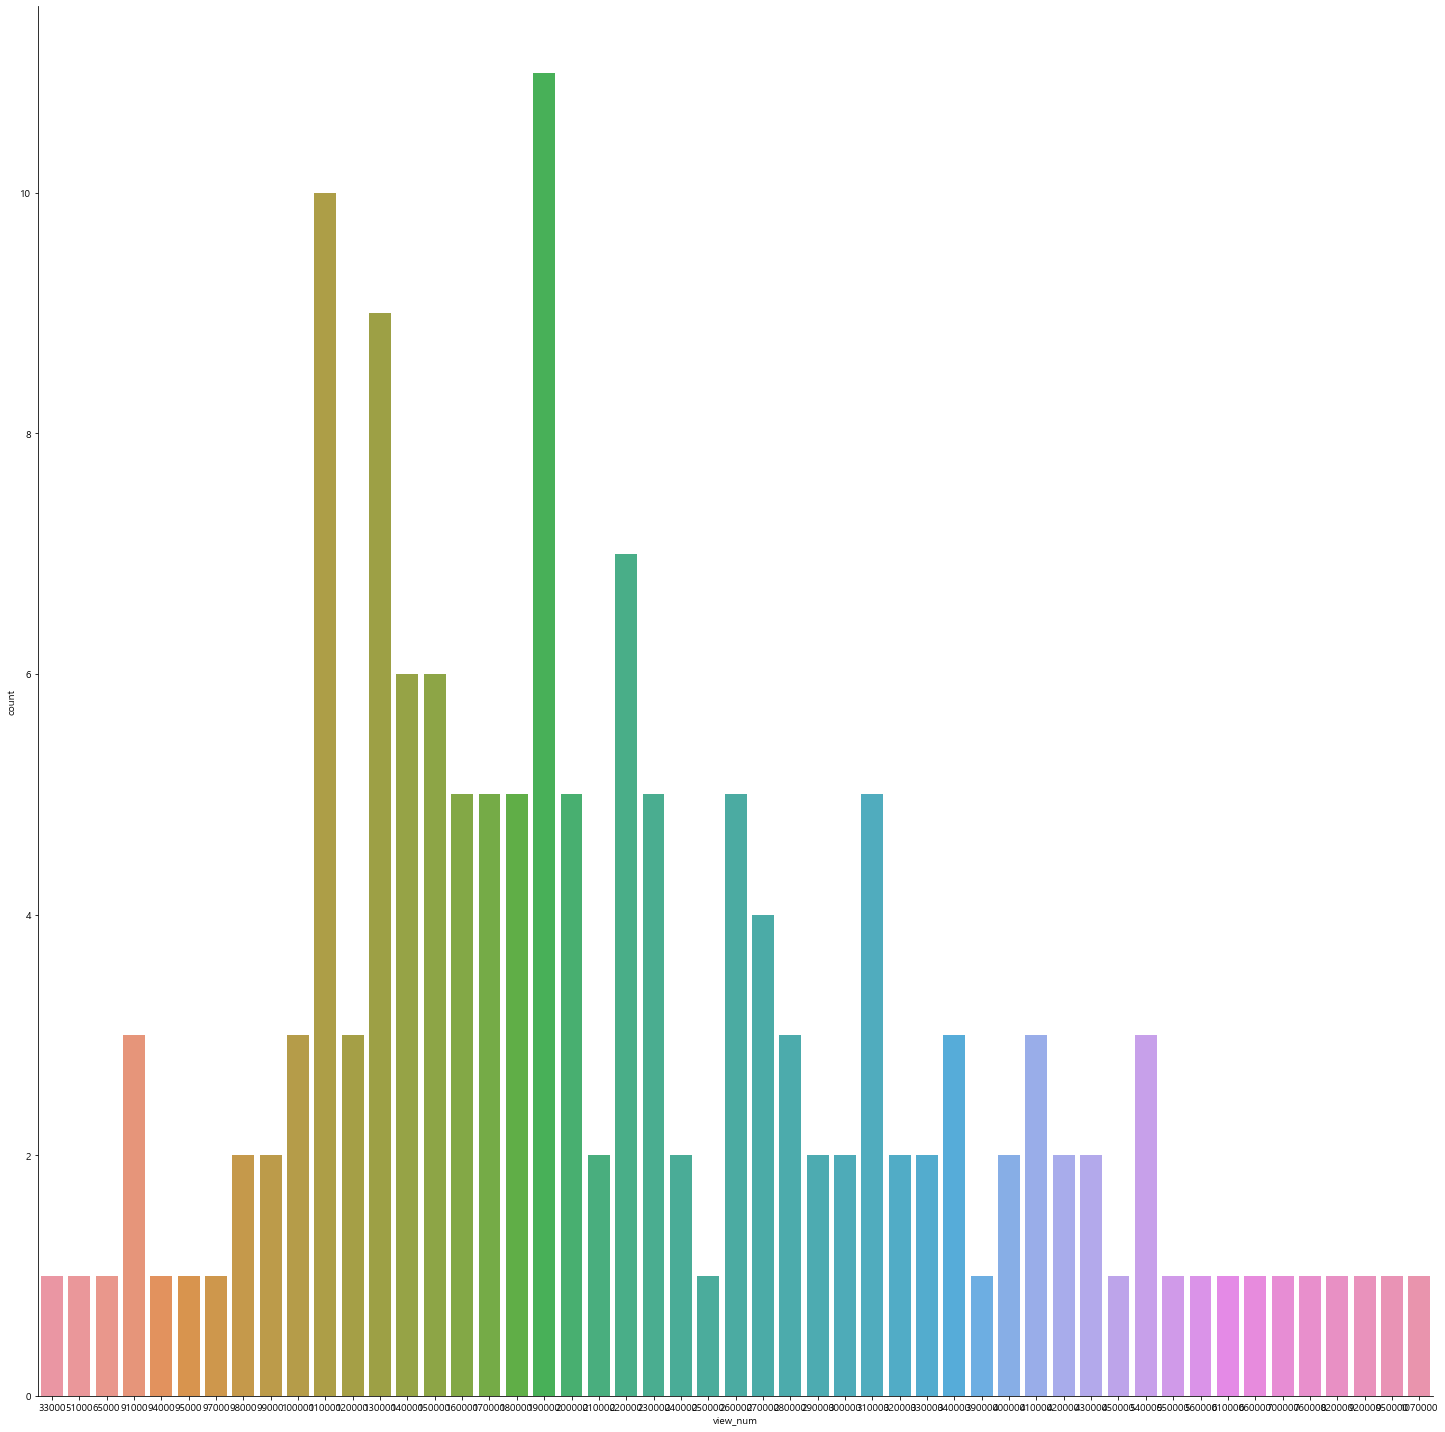

In [51]:
g = sns.factorplot("view_num", data = youtube, kind = "count", size = 20)
g.set_xlabels()

In [55]:
youtube = youtube.dropna(subset = ["view_num"]) #조회수가 null 인 줄 삭제
youtube["view_num2"] = 0 #컬럼 생성 및 초기화

In [56]:
youtube

,title,video_time,view_num,view_num2
0,4년 만에 돌아온 햇님표 스크램블 에그 먹방~!! 20200702/Mukbang,4773,91000,0
1,"시원하게 육전냉면과 명태육전보쌈 모듬전 먹방~!! 20200702/Mukbang, ...",2038,51000,0
2,치과 다녀와서 오늘은 빵만 먹겠습니다 20200701/Mukbang,5913,110000,0
3,결국 먹게되는 후식 서브웨이 샌드위치 75cm 먹방 20200630/Mukbang,2420,130000,0
4,친구가 하나씩 끓여주는 라면 먹기 20200630/Mukbang,2843,210000,0
...,...,...,...,...
145,"간만에 먹는 마라탕과 꿔바로우 먹방!! 20200312/ Mukbang, eatin...",5053,270000,0
146,게임 무경험자 햇님의 배틀 그라운드 입성기!! 20200311,2221,33000,0
147,"간만에 먹는 다쿠아즈로 후식 먹방~! 20200311/Mukbang, eating ...",2044,100000,0
148,"드디어 먹는 불닭치킨 그리고피자 먹방!! 20200311Mukbang, eating...",4322,170000,0


In [59]:
for index in range(len(youtube)):
    #youtube "view_num" 컬럼의 index번째 데이터를 view_num에 대입
    view_num = youtube["view_num"][index] 
    if(view_num < 200000):
        youtube["view_num2"][index] = 0
    elif(view_num < 400000):
        youtube["view_num2"][index] = 1
    else:
        youtube["view_num2"][index] = 2

youtube

C:\ai\python\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\ai\python\anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\ai\python\anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


,title,video_time,view_num,view_num2
0,4년 만에 돌아온 햇님표 스크램블 에그 먹방~!! 20200702/Mukbang,4773,91000,0
1,"시원하게 육전냉면과 명태육전보쌈 모듬전 먹방~!! 20200702/Mukbang, ...",2038,51000,0
2,치과 다녀와서 오늘은 빵만 먹겠습니다 20200701/Mukbang,5913,110000,0
3,결국 먹게되는 후식 서브웨이 샌드위치 75cm 먹방 20200630/Mukbang,2420,130000,0
4,친구가 하나씩 끓여주는 라면 먹기 20200630/Mukbang,2843,210000,1
...,...,...,...,...
145,"간만에 먹는 마라탕과 꿔바로우 먹방!! 20200312/ Mukbang, eatin...",5053,270000,1
146,게임 무경험자 햇님의 배틀 그라운드 입성기!! 20200311,2221,33000,0
147,"간만에 먹는 다쿠아즈로 후식 먹방~! 20200311/Mukbang, eating ...",2044,100000,0
148,"드디어 먹는 불닭치킨 그리고피자 먹방!! 20200311Mukbang, eating...",4322,170000,0


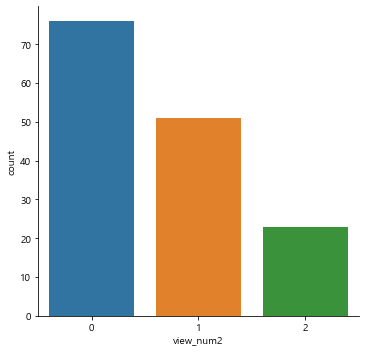

In [60]:
g = sns.factorplot("view_num2", data = youtube, kind = "count", size = 5)
g.set_xlabels()

In [32]:
import numpy as np
from sklearn.model_selection import train_test_split

In [61]:
X_train, X_test, y_train, y_test = train_test_split(youtube["title"], youtube["view_num2"]) #train, test data 분리

In [62]:
X_train

102               시작(?)은 꼬치구이 술방!! /Mukbang, eating show
117    시작은 햄버거였는데.. 잘 모르겠어요.... 20200402/Mukbang, eat...
63     [ENG/EDIT] 곱창떡볶이,곱창튀김&서울도넛츠 먹방편~! /20200512방송 ...
98                 팔도BB면과 치즈돈까스, 노랑통닭 그리고.....  20200416
125         퐁신퐁신?한 에그셀런트 계란토스트로 후식 먹방!! 20200326/Mukbang
                             ...                        
93                     추억의 달고나 만들어 먹기!! 20200421/Mukbang
85                빚은 만주세트로 간단하게 후식 먹방~! 20200427.Mukbang
149    스쳐가는 케이크와 망고로 후식 먹방!! 20200310/Mukbang, eating...
132           [ENG/EDIT] 곱창전골과 후식 먹방편~! /20200319방송 편집버전
101                          봄봄봄!! 봄나물 튀김 특집!!  20200414
Name: title, Length: 112, dtype: object

In [63]:
y_train

102    2
117    2
63     0
98     2
125    0
      ..
93     1
85     0
149    0
132    2
101    2
Name: view_num2, Length: 112, dtype: int64

In [64]:
#명사와 형용사만을 리턴하는 함수
def getNounAndAdject(text): 
    stems = []
    tagged = twitter.pos(text, stem = True)
    for i in range(0, len(tagged)):
        if(tagged[i][1] == "Noun" or tagged[i][1] == "Adjective"):
            stems.append(tagged[i][0])
    return stems

In [65]:
from sklearn.feature_extraction.text import TfidfVectorizer

#TF-IDF(단어 빈도-역 문서 빈도, Term Frequency-Inverse Document Frequency): 문서군 내의 특정 단어의 중요도를 수치화
#TF-IDF = TF(단어 빈도) * IDF(역 문서 빈도)
#가중치 부여(tf 높을수록, idf가 낮을수록 커짐)

#문자열의 tfidf를 계산하는 객체
vectorizer = TfidfVectorizer(min_df = 2, tokenizer = getNounAndAdject)

In [66]:
X_train_vector = vectorizer.fit_transform(X_train) #학습데이터의 tfidf
X_test_vector = vectorizer.transform(X_test) #테스트데이터의 tfidf

In [67]:
df_tfidf1 = pd.DataFrame(X_train_vector.A, columns = vectorizer.get_feature_names()) #X_train_vector를 데이터 프레임으로 변환
df_tfidf1

,간단하다,간만,간장게장,갈비탕,감자전,개,계란,골드,곱창,곱창전골,...,특집,편,편집,표,피자,핫도그,햄버거,햇님,회관,후식
0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000
1,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.684077,0.0,0.0,0.000000
2,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.769667,0.000000,...,0.000000,0.212330,0.218900,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000
3,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000
4,0.000000,0.0,0.0,0.0,0.0,0.0,0.862711,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.433555
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000
108,0.670679,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.337050
109,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.550195
110,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.641093,...,0.000000,0.331737,0.342001,0.0,0.0,0.0,0.000000,0.0,0.0,0.322181


In [68]:
df_tfidf2 = pd.DataFrame(X_test_vector.A, columns = vectorizer.get_feature_names()) #X_test_vector를 데이터 프레임으로 변환
df_tfidf2

,간단하다,간만,간장게장,갈비탕,감자전,개,계란,골드,곱창,곱창전골,...,특집,편,편집,표,피자,핫도그,햄버거,햇님,회관,후식
0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,...,0.0,0.000000,0.000000,0.000000,0.000000,0.00000,0.0,0.000000,0.0,0.857340
1,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,...,0.0,0.000000,0.000000,0.000000,0.000000,0.00000,0.0,0.000000,0.0,0.000000
2,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,...,0.0,0.000000,0.000000,0.000000,0.000000,0.00000,0.0,0.000000,0.0,0.000000
3,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,...,0.0,0.000000,0.000000,0.000000,0.000000,0.00000,0.0,0.000000,0.0,0.000000
4,0.000000,0.847991,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,...,0.0,0.000000,0.000000,0.000000,0.000000,0.00000,0.0,0.000000,0.0,0.454399
5,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,...,0.0,0.000000,0.000000,0.000000,0.000000,0.00000,0.0,0.000000,0.0,0.000000
6,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,...,0.0,0.294394,0.303503,0.000000,0.000000,0.00000,0.0,0.000000,0.0,0.000000
7,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.851745,0.0,...,0.0,0.000000,0.000000,0.000000,0.000000,0.00000,0.0,0.000000,0.0,0.000000
8,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,...,0.0,0.300157,0.309444,0.000000,0.000000,0.00000,0.0,0.000000,0.0,0.000000
9,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,...,0.0,0.000000,0.000000,0.000000,0.000000,0.00000,0.0,0.000000,0.0,0.000000


In [ ]:
#___________________________Decision Tree______________________________________

In [69]:
#모델 성능 평가
from sklearn.metrics import classification_report, confusion_matrix

#data set 분할
from sklearn.model_selection import train_test_split

#Decision Tree 알고리즘 서브 패키지
from sklearn.tree import DecisionTreeClassifier

from sklearn import tree

#IPython 내에 정보를 보여주는 도구용 공용 API
#Image : raw 데이터가 있는 PNG, JPEG 이미지 객체를 만드는 모듈
from IPython.display import Image

import pandas as pd
import numpy as np

#그래프를 생성하는 graphviz의 Dot 언어를 파이썬 인터페이스에 제공하는 모듈
import pydotplus

#운영체제와 상호작용하기 위한 기본적인 기능
import os

In [70]:
df_clf = DecisionTreeClassifier()
df_clf = df_clf.fit(X_train_vector, y_train)
df_prediction = df_clf.predict(X_test_vector)

In [71]:
df_prediction

array([0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 2, 2, 0, 0, 0, 1, 0, 1, 0, 0, 0, 2, 0, 1], dtype=int64)

In [72]:
y_test

67     0
38     0
97     0
57     0
147    0
39     1
32     0
68     1
7      0
8      1
64     2
108    1
28     0
136    2
131    2
54     0
100    1
91     1
104    2
75     1
84     1
5      0
113    1
119    0
48     1
27     0
133    2
120    1
58     0
87     1
139    0
42     1
129    0
9      0
66     0
94     1
116    1
106    1
Name: view_num2, dtype: int64

In [73]:
confusion_matrix(y_test, df_prediction) #모델 성능 평가

array([[13,  3,  1],
       [10,  4,  2],
       [ 4,  1,  0]], dtype=int64)

In [74]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, df_prediction)
print("정확도", accuracy)

정확도 0.4473684210526316


In [75]:
from sklearn.tree import export_graphviz

export_graphviz(
    df_clf,
    out_file = "youtube_tree.dot",
    feature_names = df_tfidf1.columns,
    class_names = ["bad", "normal", "good"],
    rounded = True,
    filled = True
)

In [ ]:
# ! pip install graphviz

In [76]:
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

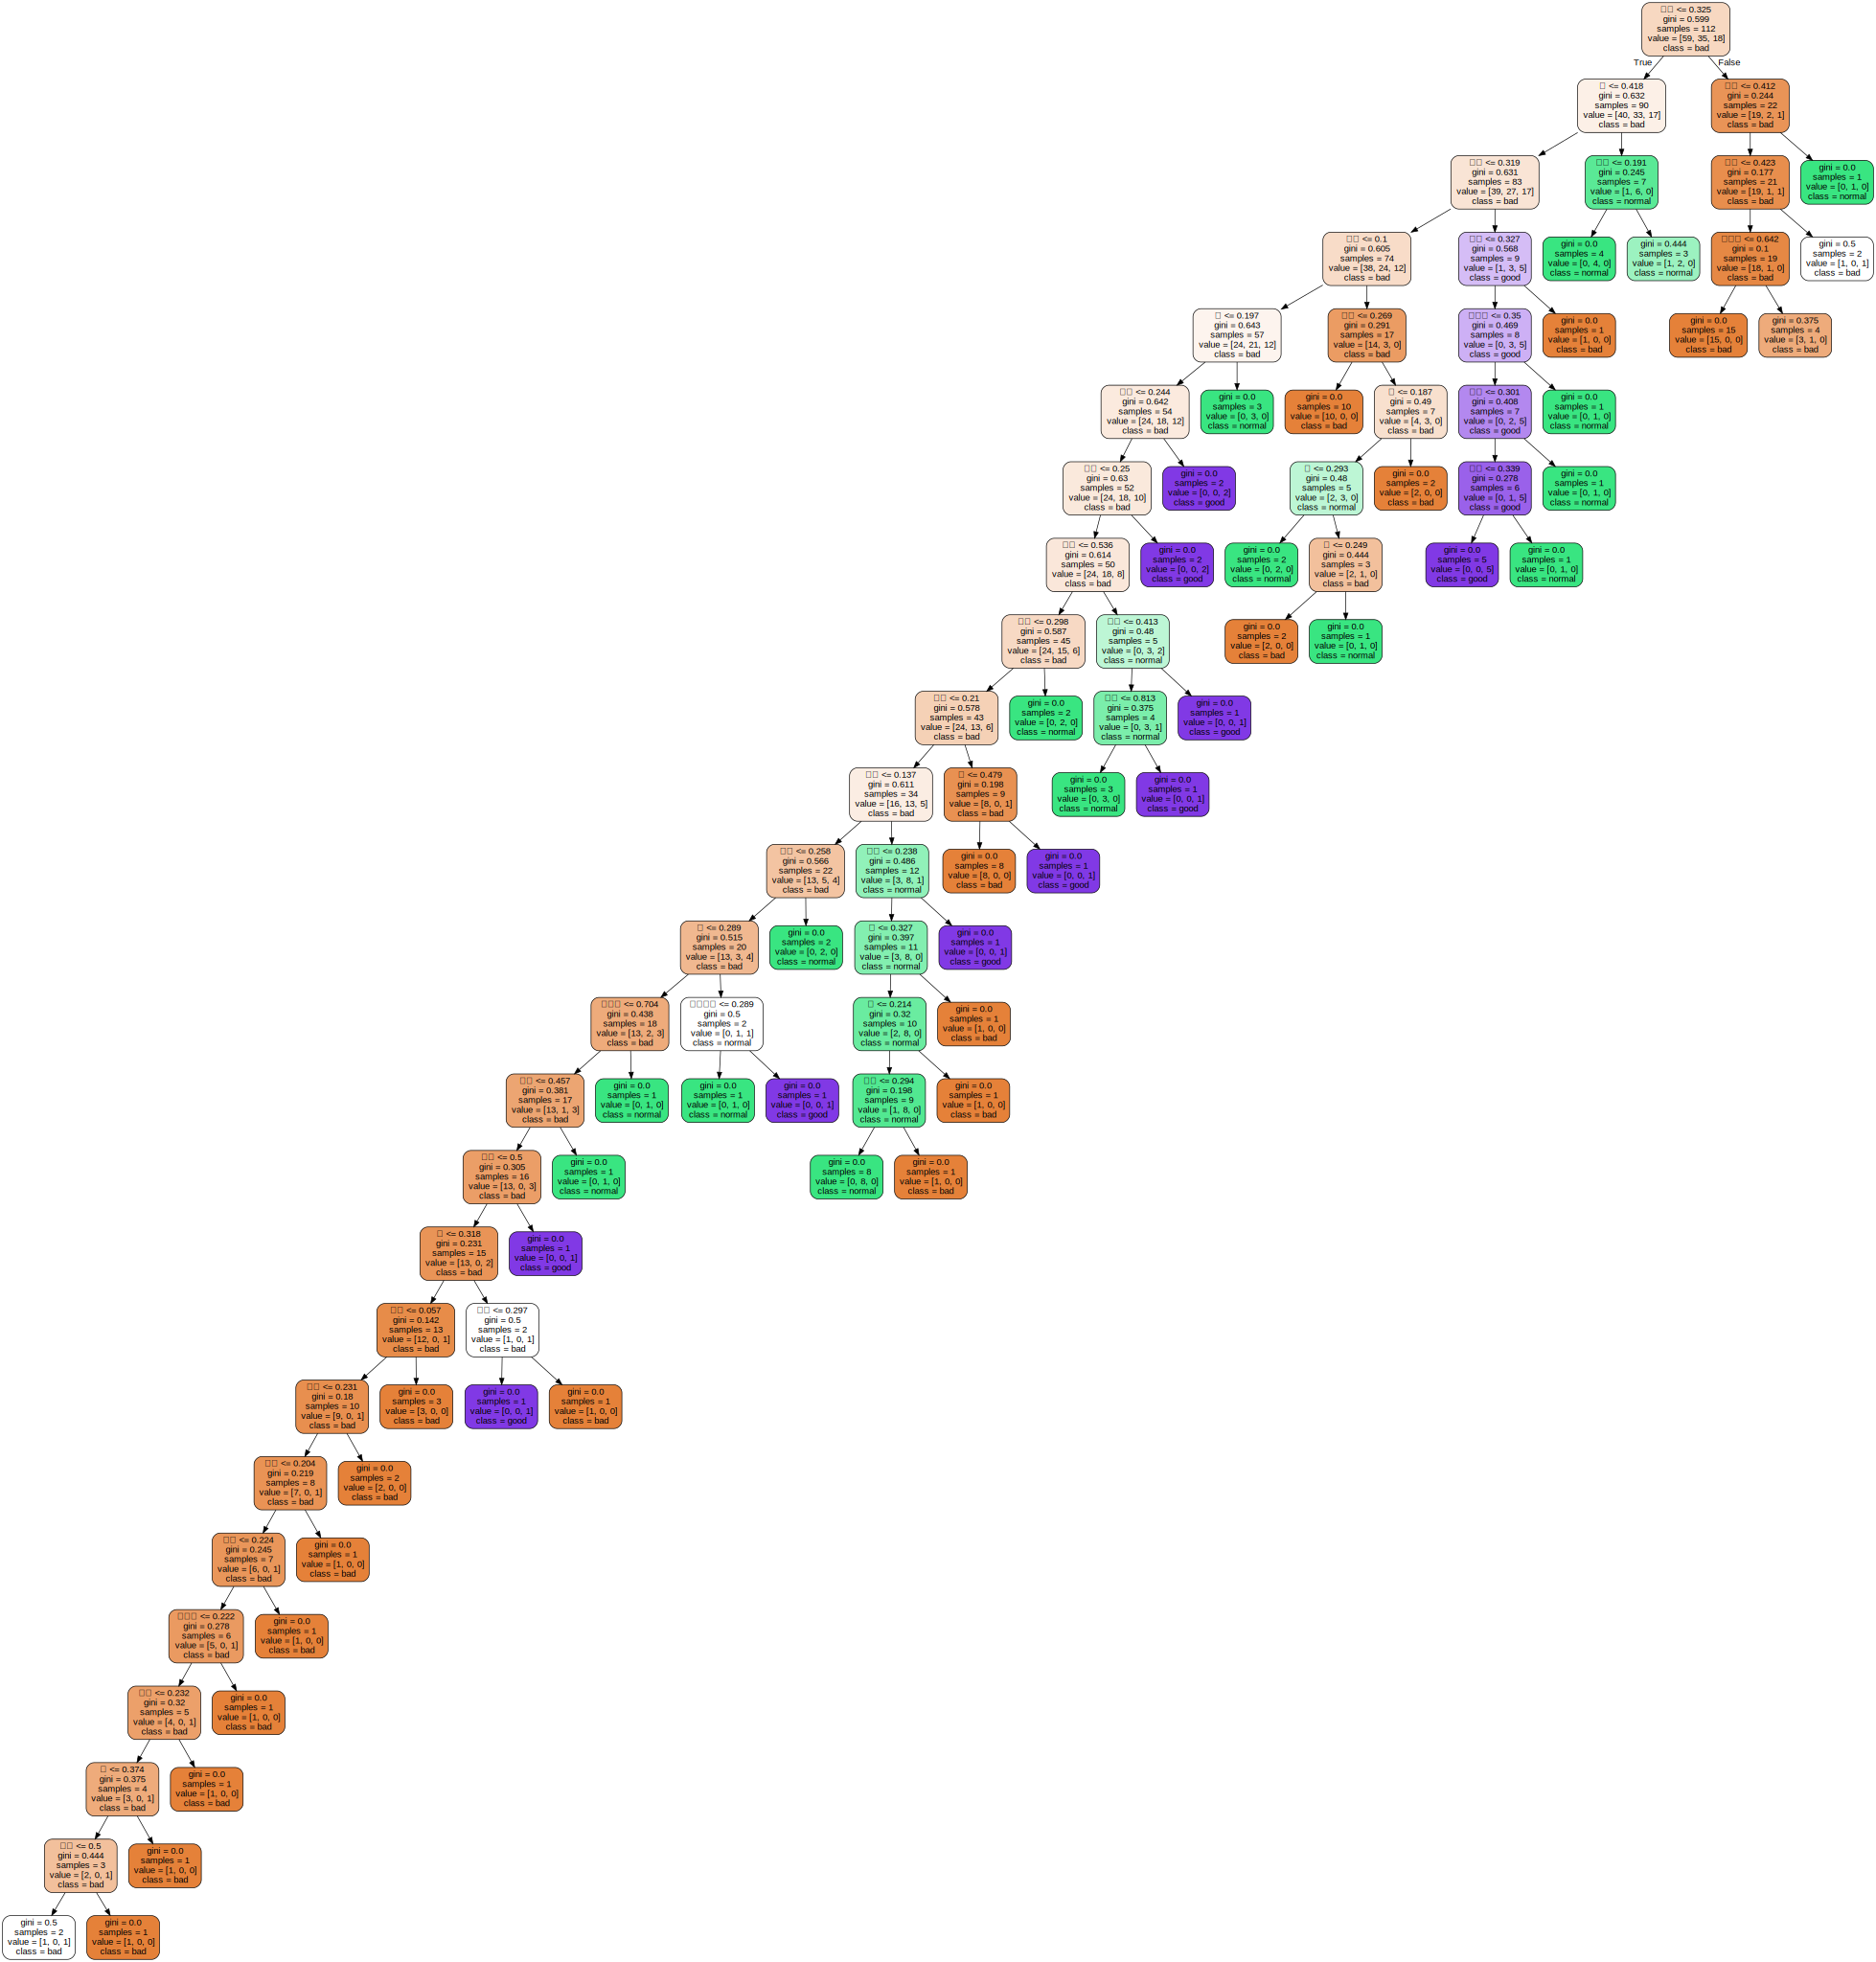

In [77]:
import graphviz

with open("youtube_tree.dot", encoding = "UTF-8") as f:
    dot_graph = f.read()

dot = graphviz.Source(dot_graph, encoding = "UTF-8")

dot